# 1.导包并设置中文显示

In [19]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.rcParams['font.sans-serif'] = ['SimHei'] 

# 2.读取绘图所需数据  'BCIspeed.csv' 并查看数据
    - BCIspeed 中是巴拿马（Panama）动物园的动物抓拍数据
        - species 是动物名称
        - time 是动物被抓拍的时间
        - speed 是动物在被抓拍是的速度 米/秒

In [2]:
data = pd.read_csv("./BCIspeed(1).csv")

In [3]:
data

,species,time,speed
0,agouti,0.339028,0.200000
1,agouti,0.582315,0.300000
2,coati,0.592454,0.400000
3,ocelot,0.509271,0.500000
4,agouti,0.403553,0.600000
...,...,...,...
2199,coati,0.400046,0.566667
2200,coati,0.400046,0.333333
2201,squirrel,0.746065,0.162500
2202,brocket,0.527095,0.205263


# 3.我们发现time列的数据需要修改,修改一下time列让每行时间都*24,并查看修改后的 数据

In [4]:
data["time"] = data["time"]*24

In [5]:
data

,species,time,speed
0,agouti,8.136667,0.200000
1,agouti,13.975556,0.300000
2,coati,14.218889,0.400000
3,ocelot,12.222500,0.500000
4,agouti,9.685278,0.600000
...,...,...,...
2199,coati,9.601111,0.566667
2200,coati,9.601111,0.333333
2201,squirrel,17.905556,0.162500
2202,brocket,12.650278,0.205263


# 4.绘制出刺豚鼠(agouti)每天活跃的时间段

In [10]:
agouti_active_time =data.groupby(by="species")

<AxesSubplot:ylabel='Frequency'>

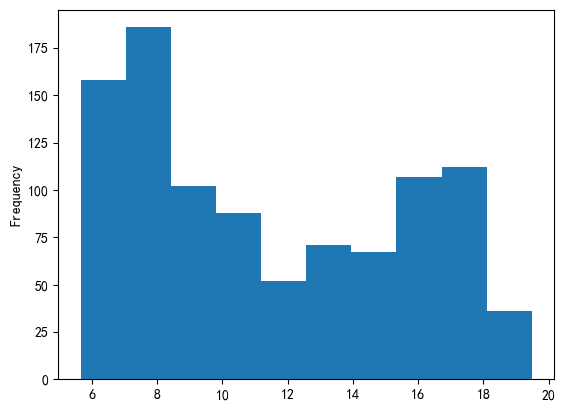

In [26]:
data.groupby(by="species").get_group("agouti")["time"].plot(kind="hist")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


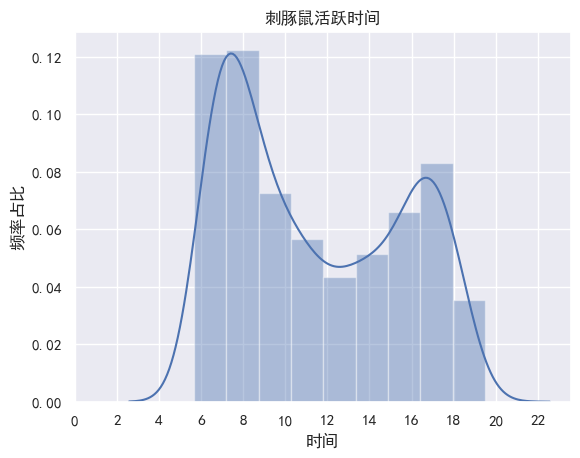

In [32]:
# group = data.groupby('species')
# agouti = group.get_group('agouti')
# data1 = agouti['time']
data1 = data.groupby(by="species").get_group("agouti")["time"]
sns.set(style='darkgrid',font='SimHei')
sns.distplot(data1,kde=True)
plt.xlabel('时间')
plt.ylabel('频率占比')
plt.title('刺豚鼠活跃时间')
plt.xticks(range(24)[::2])
plt.show()

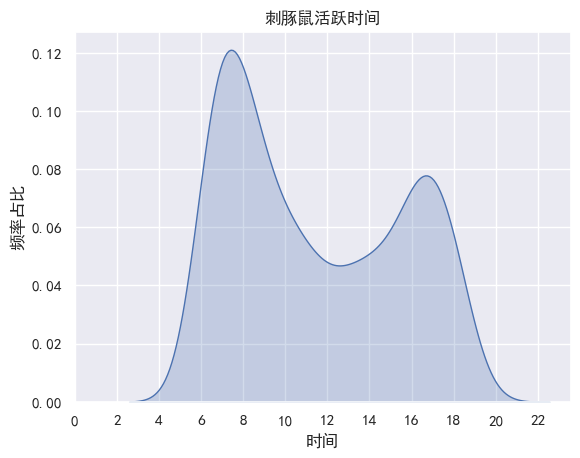

In [38]:
data1 = data.groupby(by="species").get_group("agouti")["time"]
sns.set(style='darkgrid',font='SimHei')
sns.kdeplot(data1,shade=True)
plt.xlabel('时间')
plt.ylabel('频率占比')
plt.title('刺豚鼠活跃时间')
plt.xticks(range(24)[::2])
plt.show()

# 5.查看刺豚鼠(agouti),南美浣熊(coati),短角小鹿(brocket) 之间的数据对比
    - 首先把豚鼠(agouti),南美浣熊(coati),短角小鹿(brocket) 从表中提取出来
        - 可以通过 isin 来判断这一列是否是需求的数据,判断这一列是否在列表中, 存在返回True

In [33]:
data2 = data[data['species'].isin(['agouti','coati','brocket'])]

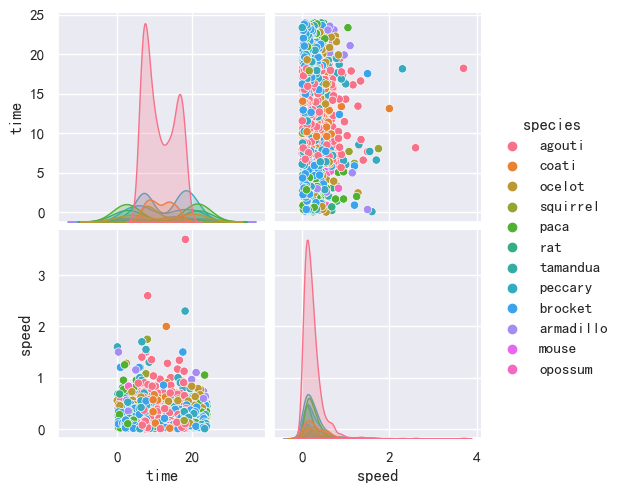

In [34]:
sns.pairplot(data,hue='species')
plt.show()